In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt
import sys
import os

In [2]:
D = read_excel(r"./data_analysis/카테고리_소분류완료.xlsx")
D

,Unnamed: 0,가구원수,근로유형,근로일수(개월),근로일수(일),삶의 사다리 점수,주거위치,식료품비-가정식비,식료품비-외식비,식료품비-주류ㆍ담배비,...,(바)사회적 친분관계 만족도,(사)여가생활 만족도,집의 (등기상) 점유형태,성별,교육수준,건강상태,만성질환,종교,혼인상태,연령
0,0,1,4,0,0,6,3,50.0,30.0,0.0,...,3,3,1,2,4,4,1,0,2,78
1,1,1,1,12,15,5,3,40.0,25.0,0.0,...,4,4,3,1,3,5,1,0,2,75
2,2,1,1,12,4,4,3,40.0,3.0,0.0,...,4,3,1,1,7,2,1,0,3,81
3,3,1,1,12,10,4,3,30.0,3.0,0.0,...,2,2,5,2,3,4,1,0,2,83
4,4,1,4,0,0,9,3,15.0,30.0,10.0,...,3,4,3,1,3,2,1,0,5,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,3329,1,1,10,10,8,3,28.0,4.0,0.0,...,4,4,1,2,3,2,1,0,2,80
3330,3330,1,1,10,10,9,3,28.0,5.0,0.0,...,4,3,2,2,3,2,1,0,2,80
3331,3331,1,1,10,10,5,3,24.0,2.0,0.0,...,3,3,2,2,2,3,1,0,2,87
3332,3332,1,1,4,10,8,3,28.0,5.0,0.0,...,4,4,2,2,3,2,1,0,2,80


In [3]:
def trans(x):
    if 0 <= x < 57:
        return 1
    elif 57 <= x < 74:
        return 2
    elif 74 <= x < 82:
        return 3 
    else:
        return 4

In [4]:
D['연령_구분'] = D['연령'].apply(trans)

In [5]:
data = D.filter(['연령_구분','방수','주거면적','총생활비'])
data

,연령_구분,방수,주거면적,총생활비
0,3,3,92,275
1,3,2,33,239
2,3,3,73,156
3,4,2,46,85
4,2,2,36,92
...,...,...,...,...
3329,3,2,59,164
3330,3,2,59,99
3331,4,2,59,72
3332,3,2,59,77


In [6]:
# 주거면적 label
def trans2(j):
    if j<25:
        return 1
    elif 25<=j<50:
        return 2
    elif 50<=j<75:
        return 3
    elif 75<=j<100:
        return 4
    else:
        return 5

In [7]:
data['주거면적'] = data['주거면적'].apply(trans2)

In [8]:
# 총생활비(label)
def trans3(x):
    if x<80:
        return 1
    elif 80<=x<120:
        return 2
    elif 120<=x<250:
        return 3
    elif 250<=x<350:
        return 4
    else:
        return 5

In [9]:
data['총생활비'] = data['총생활비'].apply(trans3)

In [10]:
# 방수 label
def trans4(i):
    if i == 1:
        return 1
    elif i == 2:
        return 2
    else:
        return 3

In [11]:
data['방수'] = data['방수'].apply(trans4)

In [12]:
data

,연령_구분,방수,주거면적,총생활비
0,3,3,4,4
1,3,2,2,3
2,3,3,3,3
3,4,2,2,2
4,2,2,2,2
...,...,...,...,...
3329,3,2,3,3
3330,3,2,3,2
3331,4,2,3,1
3332,3,2,3,1


In [16]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

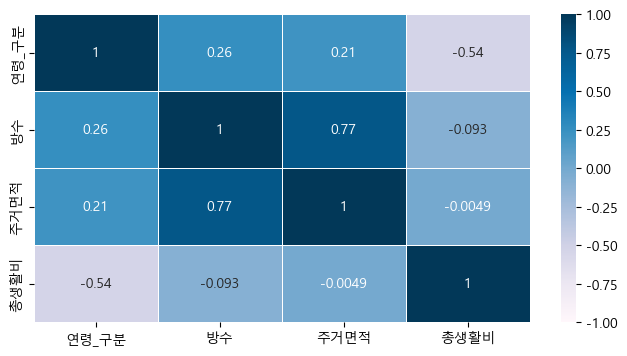

In [19]:
plt.rcParams['figure.figsize'] = (8,4)
sb.heatmap(data.corr(method='spearman'), annot=True, cmap='PuBu', vmin=-1, vmax=1, linewidths=.5)
plt.show()
plt.close()